In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import numpy as np

#Read Data

In [24]:
df=pd.read_csv('Argentina.csv')
df=df.dropna()
df.set_index('date', inplace=True)
df=df[['new_cases', 'reproduction_rate','total_vaccinations_per_hundred','icu_patients']]
print('Shape of data',df.shape)
df.head()

Shape of data (647, 4)


,new_cases,reproduction_rate,total_vaccinations_per_hundred,icu_patients
date,,,,
7/1/2020,2667,1.19,0.0,576
7/2/2020,2744,1.18,0.0,594
7/3/2020,2845,1.18,0.0,620
7/4/2020,2590,1.19,0.0,637
7/5/2020,2439,1.19,0.0,658


#Plot Your Data

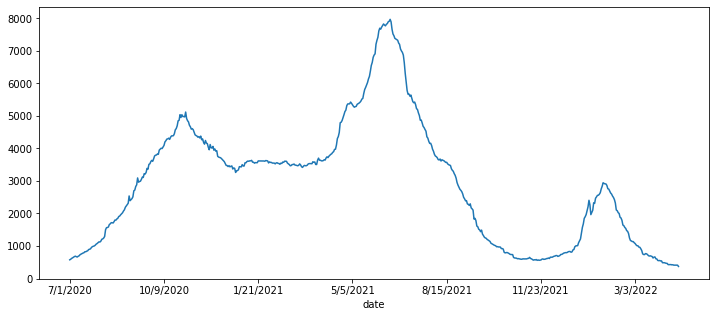

In [25]:
df['icu_patients'].plot(figsize=(12,5))

#Check For Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [16]:
chk=adfuller(df['icu_patients'],autolag='AIC')
chk[1]

0.3583808806367597

In [27]:
from statsmodels.tsa.api import VAR

#Split Data into Training and Testing

In [28]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(647, 4)
(617, 4) (30, 4)


In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [32]:
model=VAR(train)
results=model.fit(26)
results.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Nov, 2022
Time:                     20:18:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    14.6356
Nobs:                     591.000    HQIC:                   12.7346
Log likelihood:          -6339.01    FPE:                    102422.
AIC:                      11.5216    Det(Omega_mle):         53248.5
--------------------------------------------------------------------
Results for equation new_cases
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                  -5912.806981      1699.825851           -3.478           0.001
L1.new_cases                               0.821365         0.047253      

In [34]:
lag=results.k_ar
print(lag)

26


#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
3/20/2022    700.029752
3/21/2022    692.946520
3/22/2022    680.225690
3/23/2022    670.645558
3/24/2022    638.326953
3/25/2022    631.758903
3/26/2022    619.162024
3/27/2022    627.237017
3/28/2022    615.297440
3/29/2022    602.233216
3/30/2022    573.698065
3/31/2022    546.826977
4/1/2022     536.800718
4/2/2022     523.819688
4/3/2022     500.055894
4/4/2022     490.935073
4/5/2022     499.723216
4/6/2022     476.013478
4/7/2022     474.319654
4/8/2022     470.908298
4/9/2022     446.478409
4/10/2022    431.438939
4/11/2022    406.199787
4/12/2022    391.007651
4/13/2022    382.907584
4/14/2022    335.539611
4/15/2022    295.839437
4/16/2022    277.891884
4/17/2022    257.303797
4/24/2022    253.463708
Name: predicted_mean, dtype: float64


In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

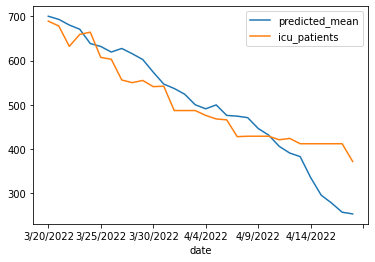

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients'].plot(legend=True)

In [ ]:
test['icu_patients'].mean()

504.6333333333333

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients']))
print(rmse)


58.881506669134325


In [ ]:
model2=ARIMA(df['icu_patients'],order=(1,0,5),seasonal_order=(1,1,1,30))
model2=model2.fit()
df.tail()

,location,new_cases,reproduction_rate,total_vaccinations_per_hundred,diabetes_prevalence,cardiovasc_death_rate,gdp_per_capita,hospital_beds_per_thousand,handwashing_facilities,life_expectancy,human_development_index,icu_patients
date,,,,,,,,,,,,
4/14/2022,Argentina,1428,0.54,214.63,5.5,191.032,18933.907,5,0,76.67,0.845,412
4/15/2022,Argentina,593,0.46,214.66,5.5,191.032,18933.907,5,0,76.67,0.845,412
4/16/2022,Argentina,551,0.39,214.71,5.5,191.032,18933.907,5,0,76.67,0.845,412
4/17/2022,Argentina,428,0.32,214.72,5.5,191.032,18933.907,5,0,76.67,0.845,412
4/24/2022,Argentina,0,0.07,216.00,5.5,191.032,18933.907,5,0,76.67,0.845,372


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2022-04-24',end='2022-05-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-04-24    381.803115
2022-04-25    372.593269
2022-04-26    361.626789
2022-04-27    360.403533
2022-04-28    340.933710
2022-04-29    348.479096
2022-04-30    348.258823
2022-05-01    367.541865
2022-05-02    369.283840
2022-05-03    365.338717
2022-05-04    356.735616
2022-05-05    346.127380
2022-05-06    354.087250
2022-05-07    355.133585
2022-05-08    347.380589
2022-05-09    351.852702
2022-05-10    374.900290
2022-05-11    357.144982
2022-05-12    363.252584
2022-05-13    371.419812
2022-05-14    358.661887
2022-05-15    363.955285
2022-05-16    357.754625
2022-05-17    363.558559
2022-05-18    366.883174
2022-05-19    348.543748
2022-05-20    332.488605
2022-05-21    332.179745
2022-05-22    324.526130
2022-05-23    328.145729
2022-05-24    345.132255
Freq: D, Name: ARIMA Predictions, dtype: float64


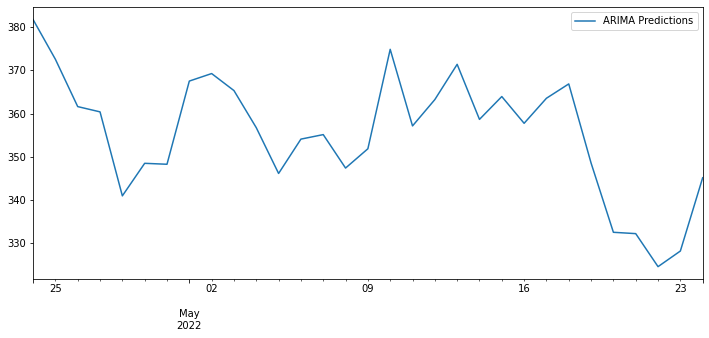

In [ ]:
pred.plot(figsize=(12,5),legend=True)
